# Week 13 Assignment

First I imported necessary libraries. Then I loaded the dataset, identified columns that I choose and columns names.

In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', sep=',', header=None, usecols=[0,1,3,5], names=["Edible","Cap_Shape","Cap_Color","Odor"])
mushrooms

,Edible,Cap_Shape,Cap_Color,Odor
0,p,x,n,p
1,e,x,y,a
2,e,b,w,l
3,p,x,w,p
4,e,x,g,n
5,e,x,y,a
6,e,b,w,a
7,e,b,w,l
8,p,x,w,p
9,e,b,y,a


 Then I replaced the codes used in the data with numeric values.
 
 Eadible: Poisonous=p=1, Edible=e=0
 
 Cap_Shape: bell=b=0, conical=c=1, convex=x=2, flat=f=3, knobbed=k=4, sunken=s=5
 
 Cap_Color: brown=n=0, buff=b=1, cinnamon=c=2, gray=g=3, green=r=4,  pink=p=5, purple=u=6, red=e=7, white=w=8, yellow=y=9 
 
 Odor: almond=a=0, anise=l=1, creosote=c=2, fishy=y=3, foul=f=4, musty=m=5, none=n=6, pungent=p=7, spicy=s=8 

In [33]:
mushrooms.replace(to_replace={"Edible":{'p': 1, 'e': 0}}, inplace=True)
mushrooms.replace(to_replace={"Cap_Shape":{'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5}}, inplace=True)
mushrooms.replace(to_replace={'Cap_Color':{'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}}, inplace=True)
mushrooms.replace(to_replace={'Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)

In [34]:
mushrooms

,Edible,Cap_Shape,Cap_Color,Odor
0,1,2,0,7
1,0,2,9,0
2,0,0,8,1
3,1,2,8,7
4,0,2,3,6
5,0,2,9,0
6,0,0,8,0
7,0,0,8,1
8,1,2,8,7
9,0,0,9,0


I used Matplolib to built the bar chart to compare quantity of Edible and Poisonous mushrooms. As we can see from the chart, it's slightly more edible mushrooms than poisonous. 

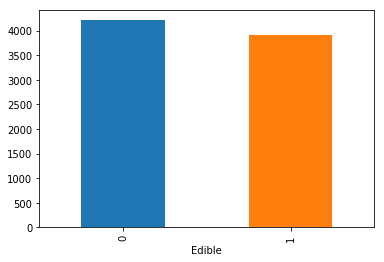

In [36]:
mplotEdible = mushrooms.groupby("Edible").size()
mplotEdible.plot(kind="bar")

Then I checked relationship between Edible/Poisonous mushrooms and odor. It looks like odor have more poisonous mushrooms than edible.

Text(0, 0.5, 'Odor')

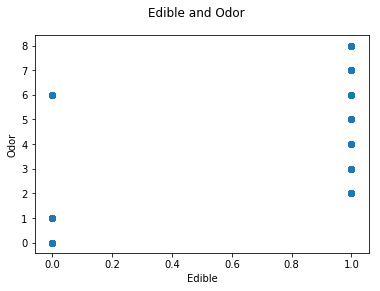

In [41]:
plt.scatter(mushrooms['Edible'], mushrooms['Odor'])
plt.suptitle('Edible and Odor')
plt.xlabel('Edible')
plt.ylabel('Odor')

Also we can see that most common odors in mushrooms are foul(4) or fishy(3) but most of the mushrooms have no odor at all(6). 

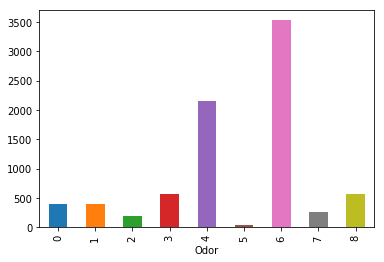

In [37]:
mplotOdor = mushrooms.groupby("Odor").size()
mplotOdor.plot(kind="bar")

From the chart below we can see that most popular cap shapes in mushroom are convex(2) and flat(3).

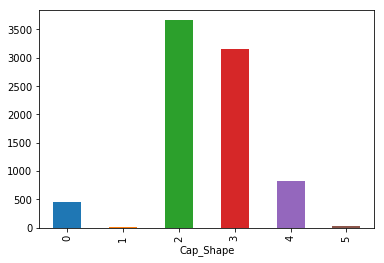

In [42]:
mplotOdor = mushrooms.groupby("Cap_Shape").size()
mplotOdor.plot(kind="bar")

Cap clors are more diverse. But three the most common colors are brown, gray, and red. 

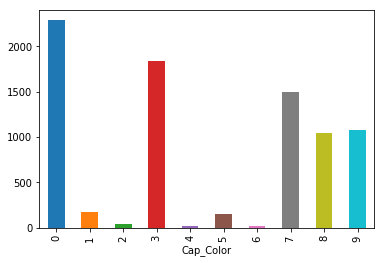

In [43]:
mplotOdor = mushrooms.groupby("Cap_Color").size()
mplotOdor.plot(kind="bar")